In [1]:
# import the libraries 
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('wheat.xlsx')

In [3]:
data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,Variety
0,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
data.isnull().sum()

area                     0
perimeter                0
compactness              0
length                   0
width                    0
asymmetry_coefficient    0
Variety                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   Variety                210 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.6 KB


In [6]:
data['Variety'].value_counts()   # Balanced Data , Binary Class Classification

Variety
1    70
2    70
3    70
Name: count, dtype: int64

 varieties of wheat: Kama, Rosa and Canadian

In [7]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry_coefficient,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


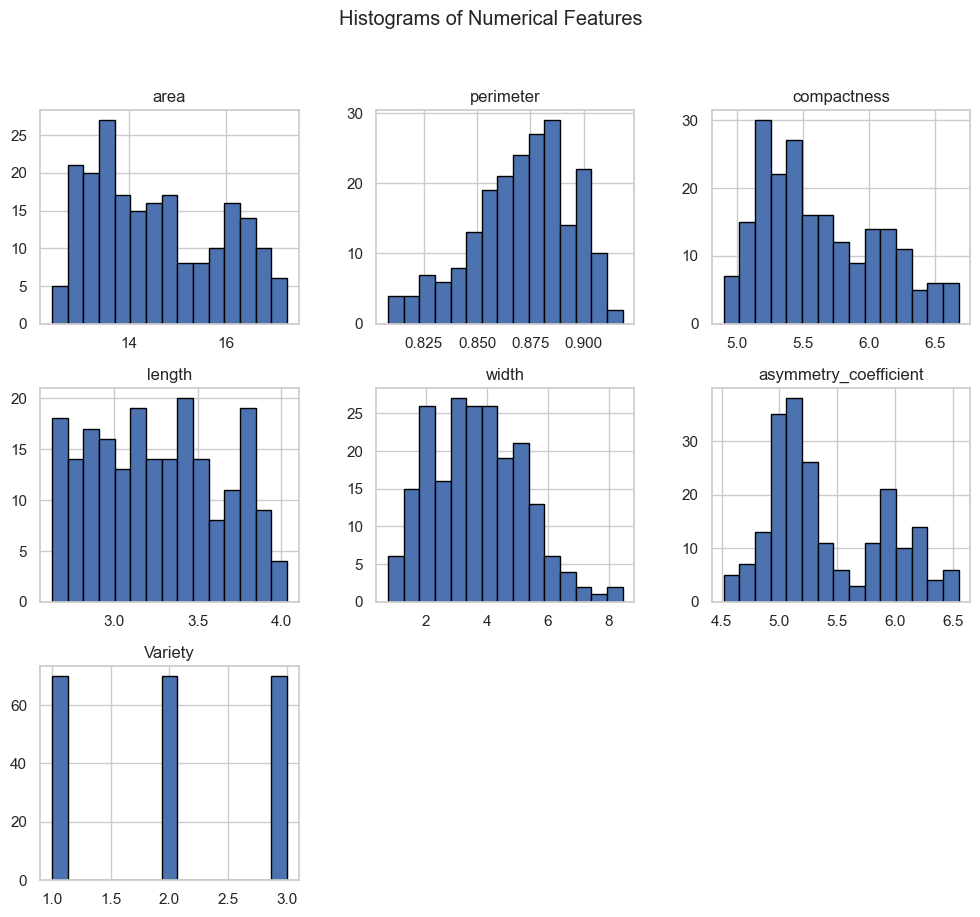

In [8]:
# Set style for seaborn
sns.set(style="whitegrid")

# Plot histograms
data.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,area,perimeter,compactness,length,width,asymmetry_coefficient,Variety
area,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
perimeter,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
compactness,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
length,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
width,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
asymmetry_coefficient,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Variety,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


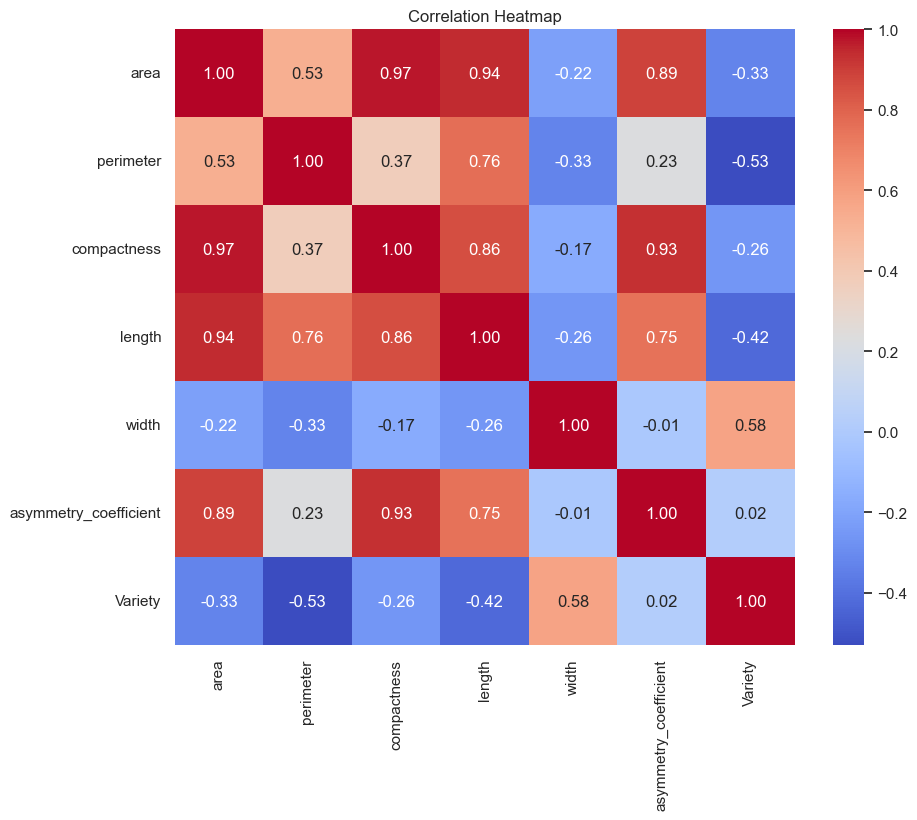

In [10]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

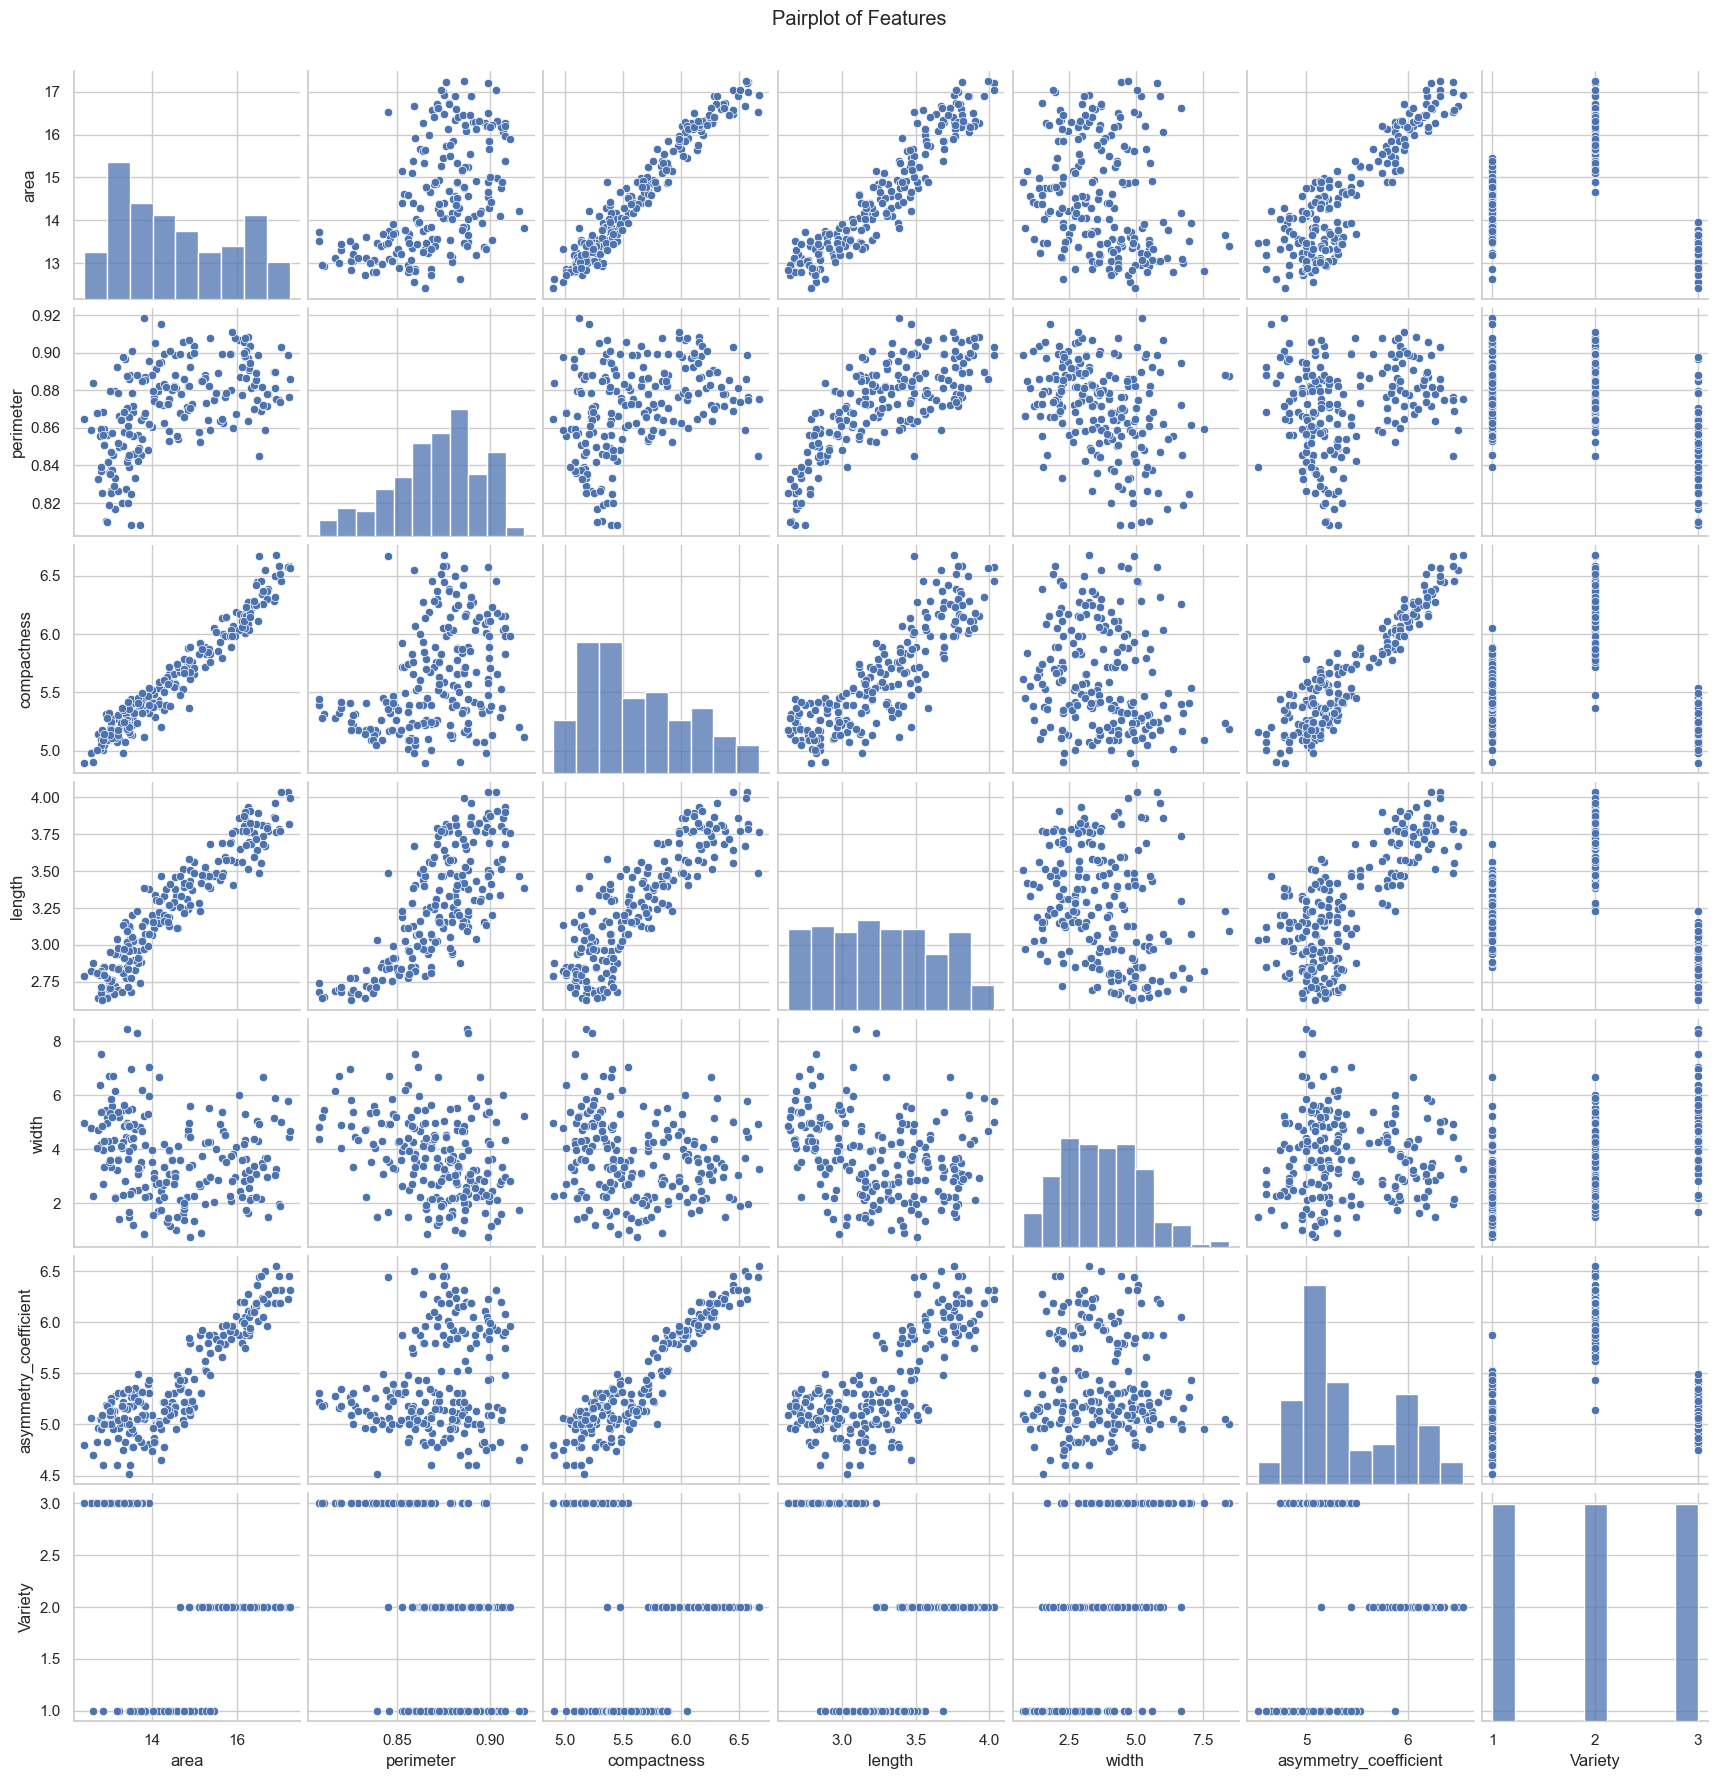

In [11]:
# Pairplot to explore relationships between features
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

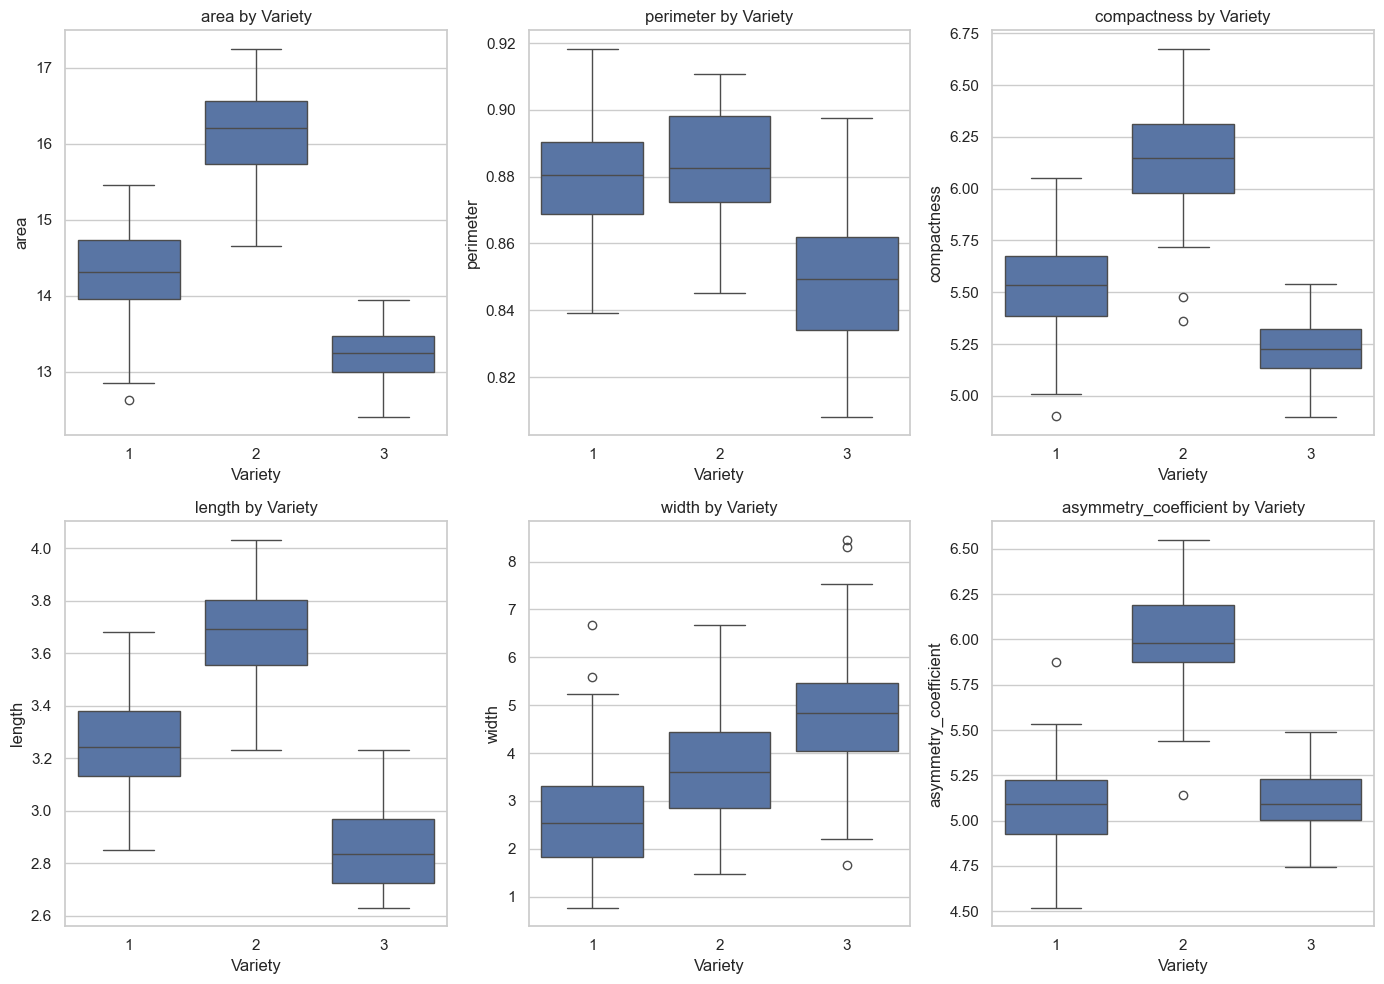

In [12]:
# Boxplots for features by Variety
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Variety', y=column, data=data)
    plt.title(f'{column} by Variety')
plt.tight_layout()
plt.show()

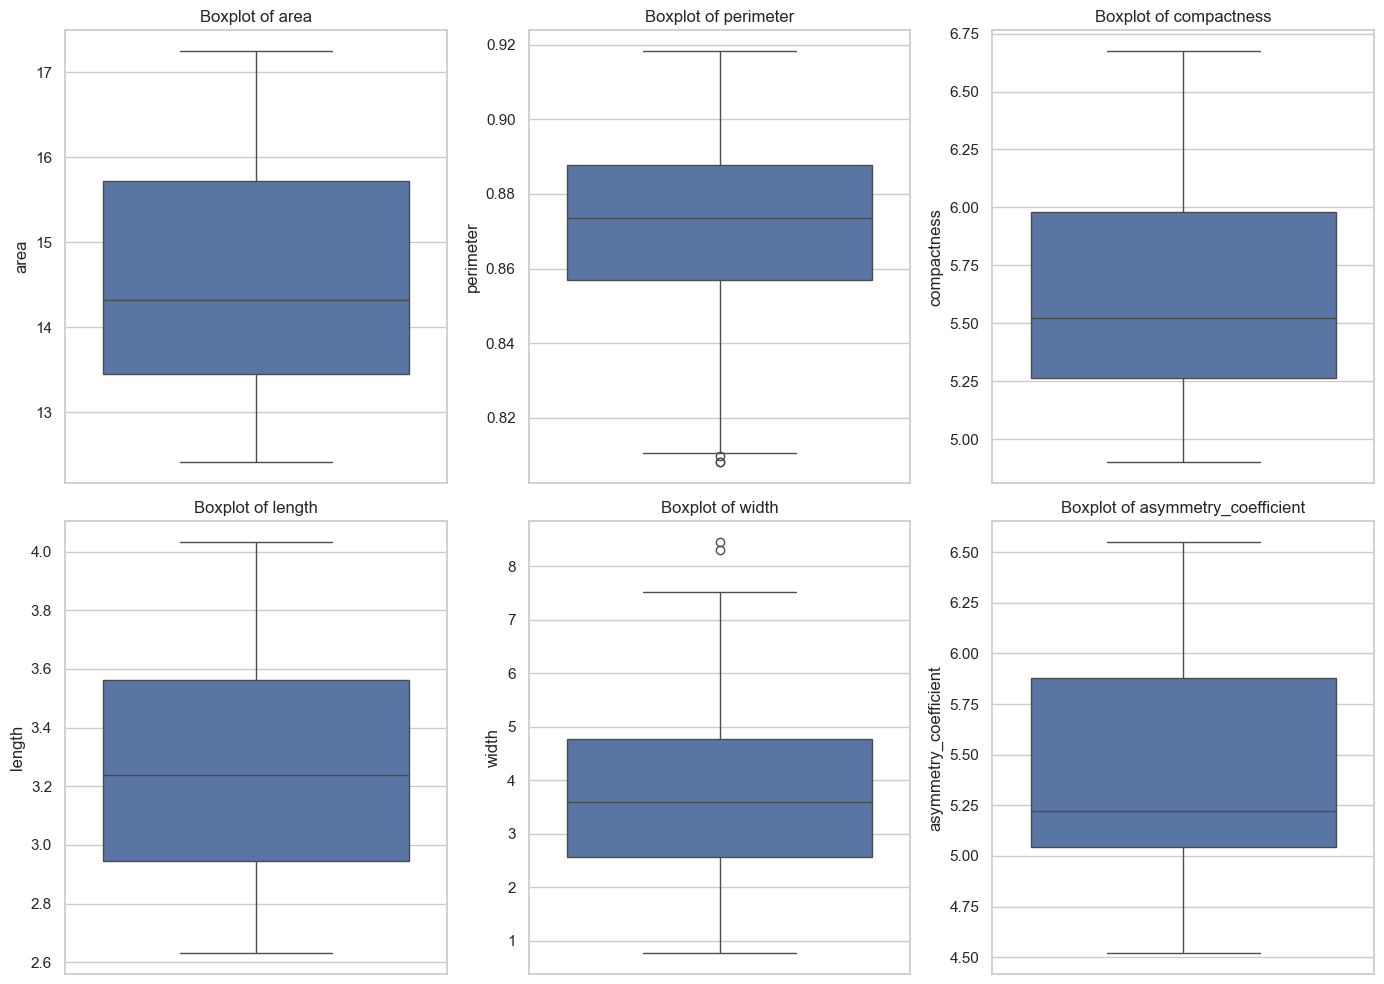

In [13]:
# Boxplots for outlier detection
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [14]:
# splitting the data into dependent and independent
X= data.drop('Variety',axis=1)
y=data['Variety']

In [15]:
X.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient
0,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.94,0.8955,5.324,3.379,2.259,4.805
4,14.99,0.9034,5.658,3.562,1.355,5.175


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: Variety, Length: 210, dtype: int64

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [20]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(168, 6) (42, 6) (168,) (42,)


In [21]:
y_train.value_counts()

Variety
2    62
3    53
1    53
Name: count, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()   # default k=5
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_train=knn.predict(x_train)
print('Training Accuracy:',accuracy_score(y_train,y_pred_train))
y_pred_test=knn.predict(x_test)
print('Testing Accuracy:',accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9285714285714286
Testing Accuracy: 0.9285714285714286


In [25]:
# How to find a Correct Value of K - no. of neighbors
error_rate=[]
for i in range(2,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred= knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

In [26]:
min(error_rate)

0.07142857142857142

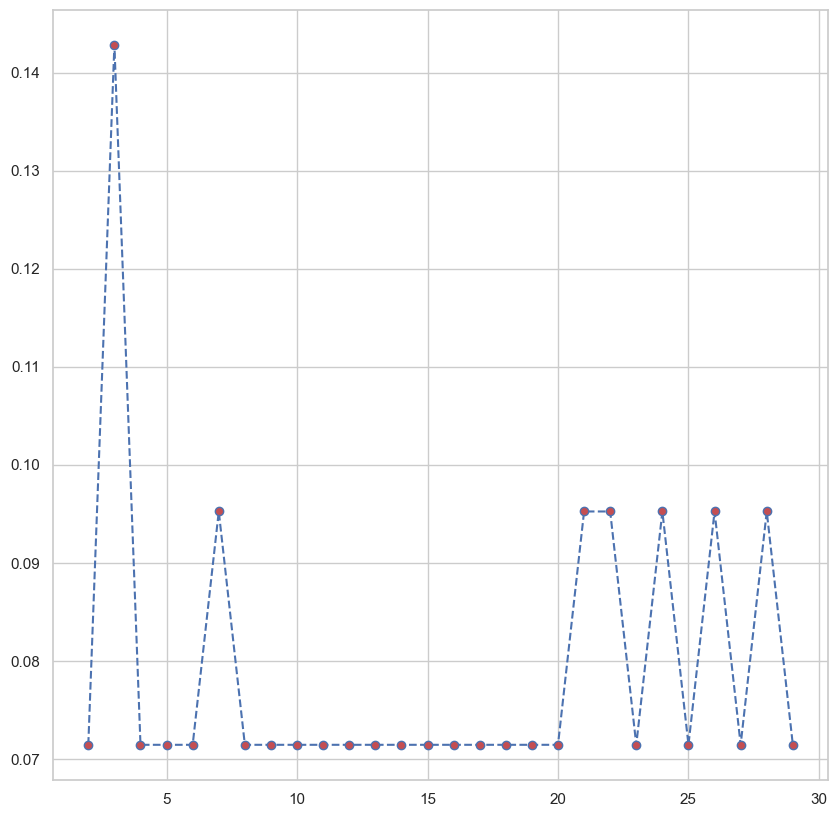

In [27]:
# Let us plot the K value vs Error rate
plt.figure(figsize=(10,10))
plt.plot(range(2,30),error_rate,linestyle='dashed',marker='o',mfc='r')

In [28]:
# from here we can take the value of k= 13 odd no.

In [29]:
knn=KNeighborsClassifier(n_neighbors=5)   # default k=5
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [30]:
y_pred_train=knn.predict(x_train)
print('Training Accuracy:',accuracy_score(y_train,y_pred_train))
y_pred_test=knn.predict(x_test)
print('Testing Accuracy:',accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9285714285714286
Testing Accuracy: 0.9285714285714286


In [31]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  2],
       [ 0,  8,  0],
       [ 0,  0, 17]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        17
           2       0.89      1.00      0.94         8
           3       0.89      1.00      0.94        17

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVM (Linear Kernel)': SVC(kernel='linear')
}

In [35]:
# Train and evaluate models
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f'{name} - Training Accuracy: {train_accuracy}')
    print(f'{name} - Testing Accuracy: {test_accuracy}')
    print()  # Blank line for readability

KNN - Training Accuracy: 0.9285714285714286
KNN - Testing Accuracy: 0.9285714285714286

GaussianNB - Training Accuracy: 0.9285714285714286
GaussianNB - Testing Accuracy: 0.9761904761904762

SVM (Linear Kernel) - Training Accuracy: 0.9285714285714286
SVM (Linear Kernel) - Testing Accuracy: 0.9523809523809523



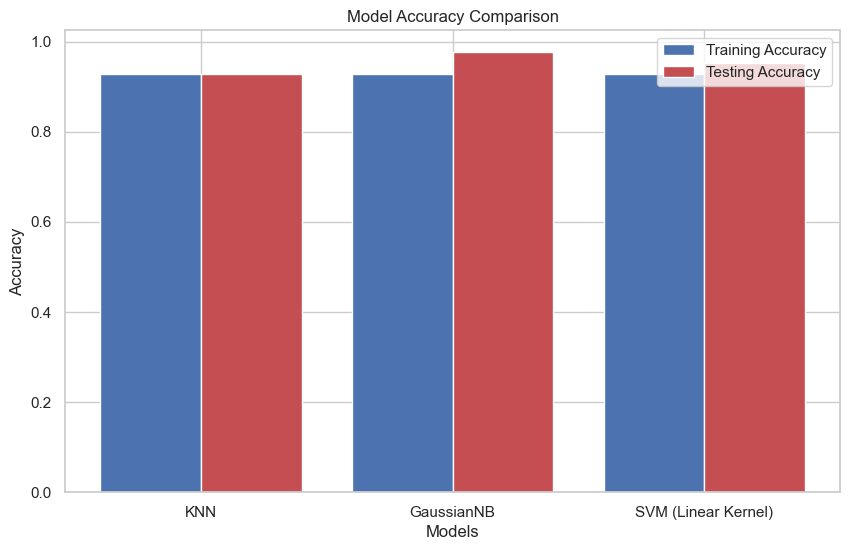

In [36]:
# Plot accuracies
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.4, label='Training Accuracy', color='b', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Testing Accuracy', color='r', align='center')
plt.xticks([i + 0.2 for i in x], models.keys())
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

In [38]:
data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,Variety
0,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [40]:
def get_user_input_and_predict(models):
    # Define variety mapping
    variety_mapping = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
    
    print("Enter feature values:")
    features = [float(input(f"{feature}: ")) for feature in ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry Coefficient']]
    features = [features]  # Convert to 2D array for prediction

    for name, model in models.items():
        prediction = model.predict(features)
        variety_name = variety_mapping.get(prediction[0], 'Unknown Variety')
        print(f"{name} Prediction: {variety_name}")


# Example of taking input and making predictions
print("Enter feature values for predictions:")
get_user_input_and_predict(models)


Enter feature values for predictions:
Enter feature values:


Area:  14.99
Perimeter:  0.9034
Compactness:  5.658
Length:  3.562
Width:  3.52
Asymmetry Coefficient:  5


KNN Prediction: Kama
GaussianNB Prediction: Kama
SVM (Linear Kernel) Prediction: Kama
